In [31]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import datasets
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Decision Tree Classifier

In [100]:
df = pd.read_csv("..\\data\clear_dataset_diabetes.csv")
#df.info
y = df["Diabetes_012"]
X = df.drop(["Diabetes_012"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

X_train_class = X_train
X_test_class = X_test
y_train_class = y_train
y_test_class = y_test




grid_space = {
  'criterion': ["gini", "entropy", "log_loss"],
  'max_depth': np.arange(1, X_train.shape[1], 1),
  #'max_leaf_nodes': np.array(range(1, int((X_train.shape[0])**1/4)))
}

grid = GridSearchCV(DecisionTreeClassifier(),param_grid=grid_space,cv=3,scoring='accuracy')

In [33]:
model_grid = grid.fit(X_train,y_train)

In [34]:
model_grid.best_params_
opt_max_depth = model_grid.best_params_['max_depth']
opt_criterion = model_grid.best_params_['criterion']
#opt_max_leaf = model_grid.best_params_['max_leaf_nodes']
opt_max_depth

5

In [35]:
tree_class = DecisionTreeClassifier(max_depth=opt_max_depth, criterion=opt_criterion)
tree_class.fit(X_train, y_train)

text_representation = tree.export_text(tree_class)
print(text_representation)


from sklearn.tree import plot_tree, export_text




|--- feature_1 <= 0.50
|   |--- feature_14 <= 2.50
|   |   |--- feature_19 <= 9.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- feature_4 <= 31.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_4 >  31.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- feature_4 <= 28.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_4 >  28.50
|   |   |   |   |   |--- class: 0.0
|   |   |--- feature_19 >  9.50
|   |   |   |--- feature_4 <= 28.50
|   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_18 >  0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_4 >  28.50
|   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_18 >  0.50
|   |   |   |   |   |--- class: 0.0
|   |--- feature_14 >  2.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_19 <= 8.50
|   |   |   |   |--- feature_4 <= 32.50


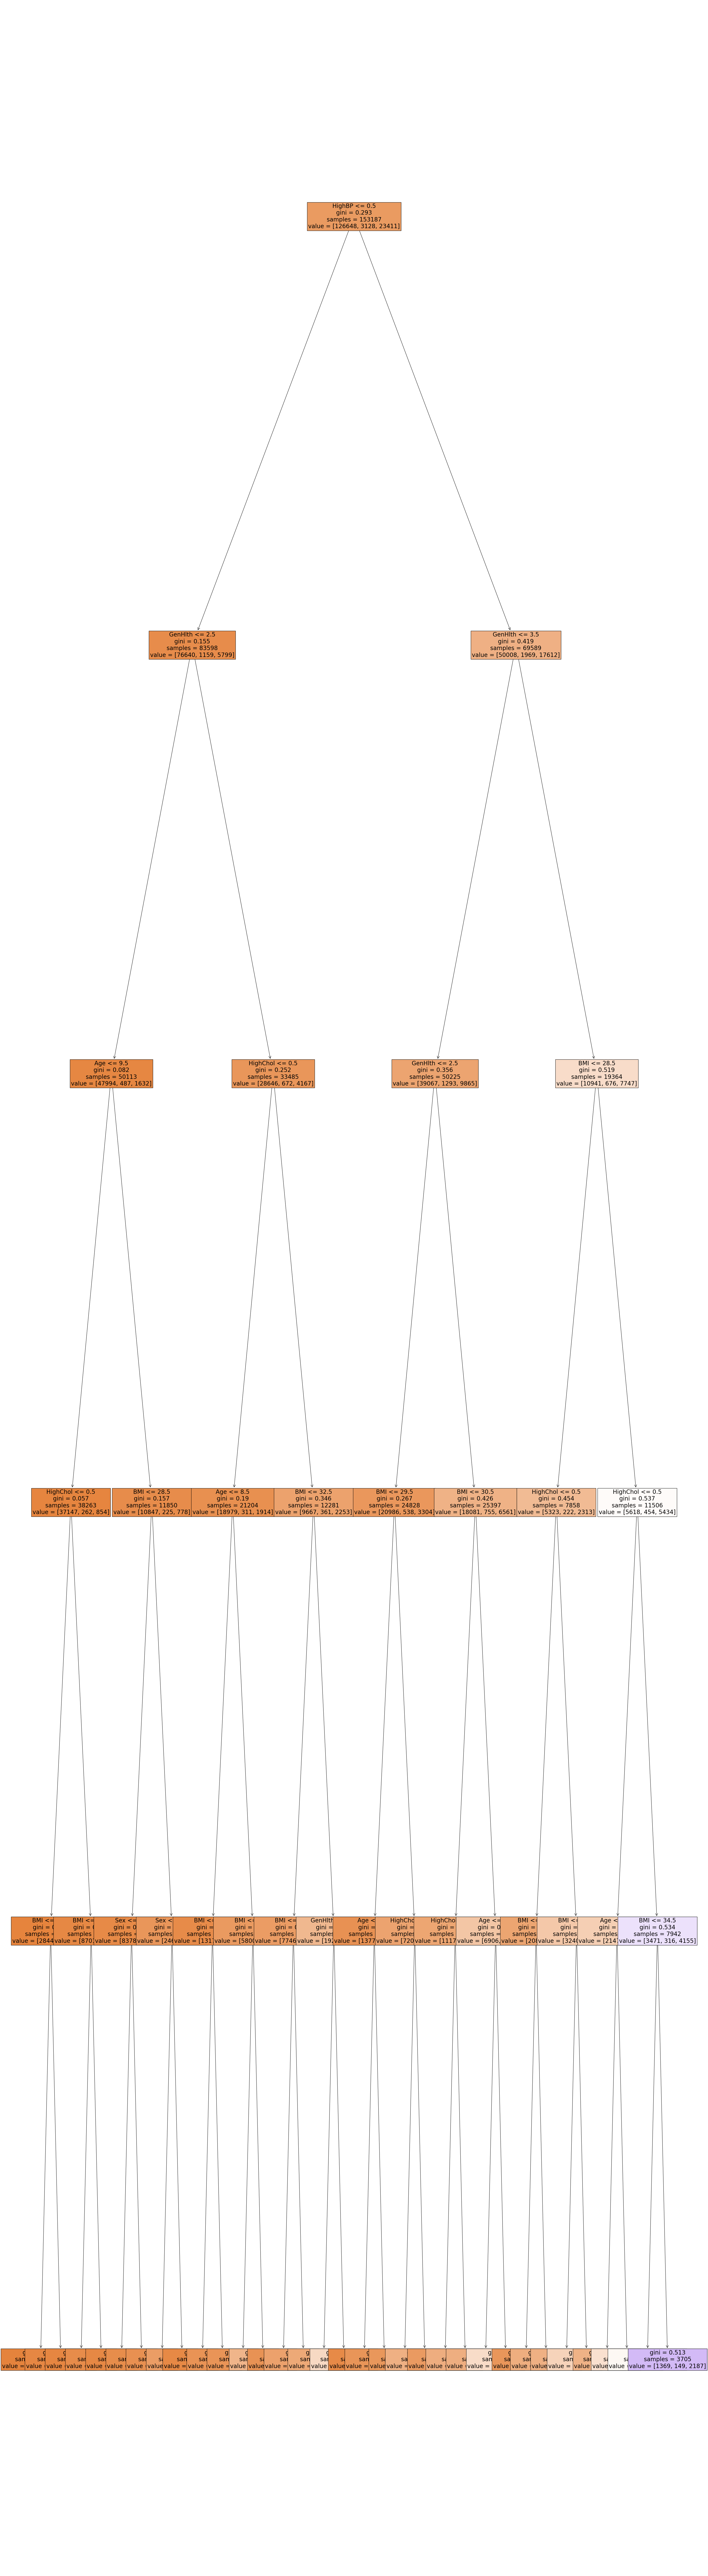

In [36]:
plt.figure(figsize =(40,160))
plot_tree(tree_class, feature_names=X_train.columns, max_depth=opt_max_depth, filled=True, fontsize=20);

In [37]:
pred_train = tree_class.predict(X_train)
pred_test = tree_class.predict(X_test)

print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))
print(accuracy_score(y_test, pred_test))

0.6103651093108423
0.6064313131576886
0.8336945452646422


In [38]:
print('Precision, Recall, F\n', classification_report(y_train, pred_train))

Precision, Recall, F
               precision    recall  f1-score   support

         0.0       0.84      0.99      0.91    126648
         1.0       0.00      0.00      0.00      3128
         2.0       0.59      0.09      0.16     23411

    accuracy                           0.83    153187
   macro avg       0.48      0.36      0.36    153187
weighted avg       0.78      0.83      0.77    153187



D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Regressor

In [39]:
df = pd.read_csv("..\\data\workinset.csv")
y = df['price_usd']
X = df.drop(['price_usd'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25687, 105), (25687,), (12844, 105), (12844,))

|--- feature_1 <= 2008.50
|   |--- feature_1 <= 2001.50
|   |   |--- feature_3 <= 2.15
|   |   |   |--- value: [1936.07]
|   |   |--- feature_3 >  2.15
|   |   |   |--- value: [3690.97]
|   |--- feature_1 >  2001.50
|   |   |--- feature_103 <= 0.50
|   |   |   |--- value: [9132.39]
|   |   |--- feature_103 >  0.50
|   |   |   |--- value: [5577.27]
|--- feature_1 >  2008.50
|   |--- feature_103 <= 0.50
|   |   |--- feature_1 <= 2013.50
|   |   |   |--- value: [17222.70]
|   |   |--- feature_1 >  2013.50
|   |   |   |--- value: [26276.12]
|   |--- feature_103 >  0.50
|   |   |--- feature_1 <= 2012.50
|   |   |   |--- value: [8565.82]
|   |   |--- feature_1 >  2012.50
|   |   |   |--- value: [13314.18]



[Text(0.5, 0.875, 'year_produced <= 2008.5\nsquared_error = 41304116.564\nsamples = 25687\nvalue = 6632.533'),
 Text(0.25, 0.625, 'year_produced <= 2001.5\nsquared_error = 10803210.691\nsamples = 18889\nvalue = 4115.335'),
 Text(0.125, 0.375, 'engine_capacity <= 2.15\nsquared_error = 3487084.358\nsamples = 11440\nvalue = 2406.087'),
 Text(0.0625, 0.125, 'squared_error = 1801501.722\nsamples = 8376\nvalue = 1936.07'),
 Text(0.1875, 0.125, 'squared_error = 5840102.334\nsamples = 3064\nvalue = 3690.966'),
 Text(0.375, 0.375, 'drivetrain_front <= 0.5\nsquared_error = 10661589.97\nsamples = 7449\nvalue = 6740.357'),
 Text(0.3125, 0.125, 'squared_error = 13241748.298\nsamples = 2437\nvalue = 9132.392'),
 Text(0.4375, 0.125, 'squared_error = 5272119.982\nsamples = 5012\nvalue = 5577.271'),
 Text(0.75, 0.625, 'drivetrain_front <= 0.5\nsquared_error = 59527756.583\nsamples = 6798\nvalue = 13626.848'),
 Text(0.625, 0.375, 'year_produced <= 2013.5\nsquared_error = 85070284.187\nsamples = 1946\nva

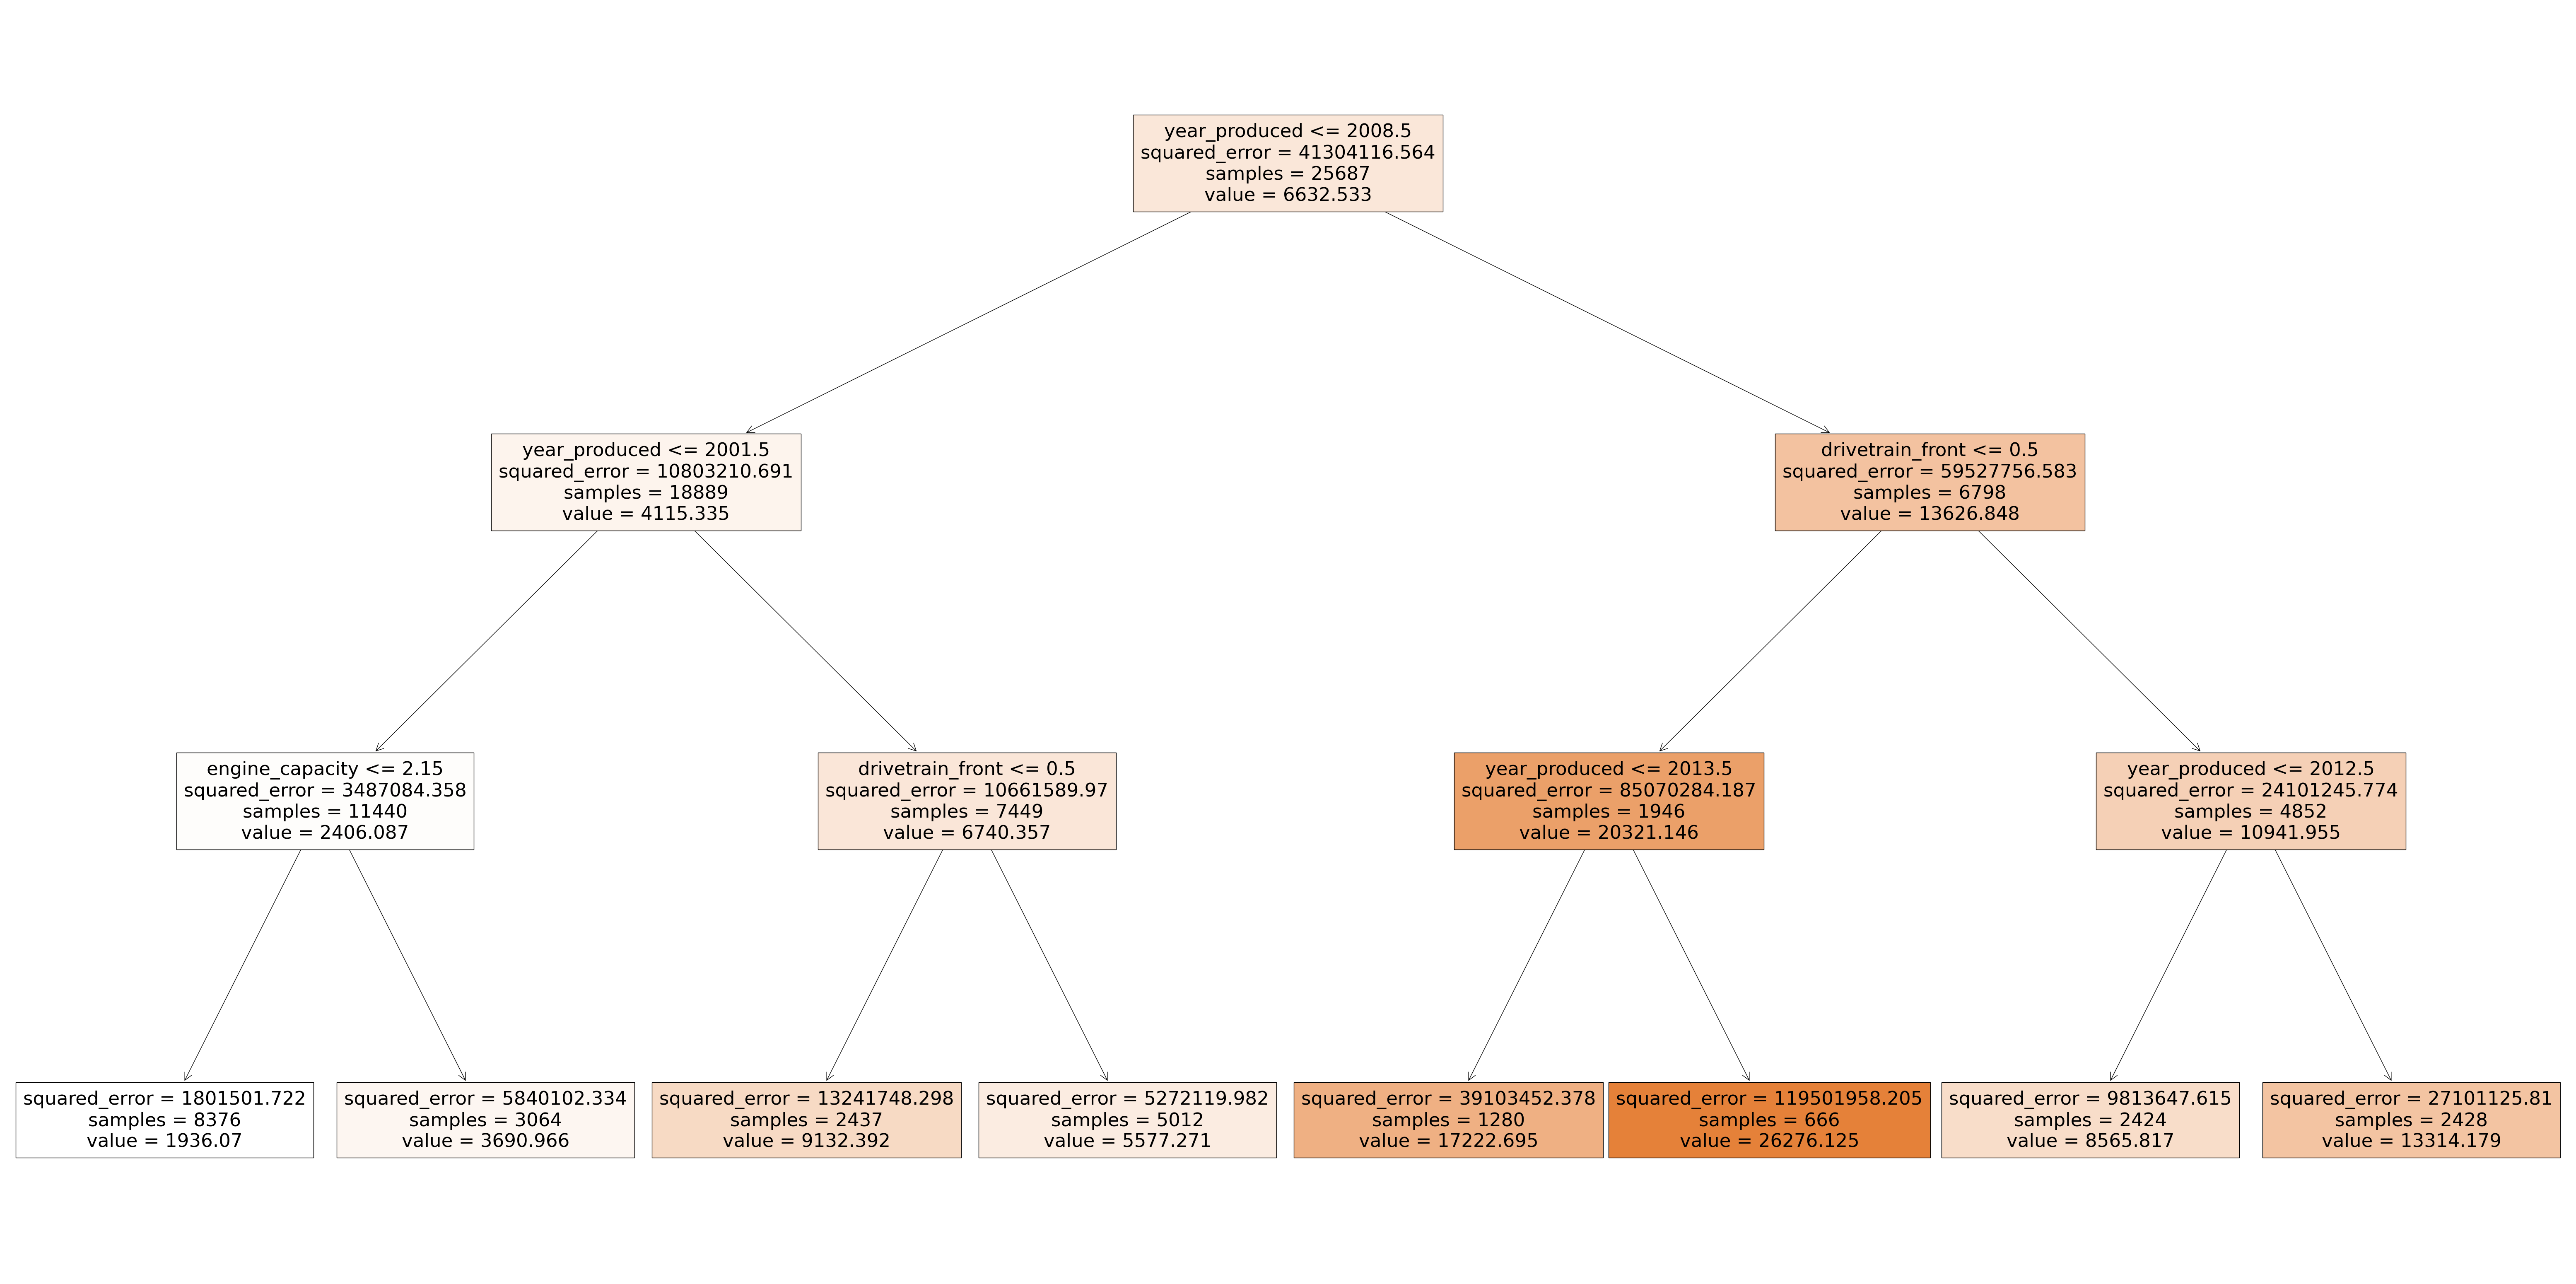

In [40]:
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

text_representation = tree.export_text(tree_reg)
print(text_representation)

fig = plt.figure(figsize=(80,40))
plot_tree(tree_reg, feature_names=X_train.columns, max_depth=15, filled=True)

In [41]:
pred_train = tree_reg.predict(X_train)
pred_test = tree_reg.predict(X_test)

#print(mean_squared_error(y_train, pred_train))
#print(mean_squared_error(y_test, pred_test))

print(tree_reg.score(X_train, y_train))
tree_reg.score(X_test, y_test)

0.7069611720233145


0.7046273899539905

# Bagging Classifier

In [47]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier

grid_space = {
  #'criterion': ["gini", "entropy", "log_loss"], 
  #'n_estimators': 5,
  #'max_samples': np.arange(0.6, 1, 0.1)
}

grid = RandomizedSearchCV(BaggingClassifier(),grid_space,cv=3, scoring='accuracy')


In [48]:
model_grid = grid.fit(X_train_class, y_train_class)

D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [59]:
bag_model = BaggingClassifier(n_estimators = 121).fit(X_train_class, y_train_class)
bag_model.score(X_test_class, y_test_class)

0.8293730579418753

In [60]:
pred_test = bag_model.predict(X_test_class)
print(accuracy_score(y_test_class, pred_test))

0.8293730579418753


# GradientBoostingClassifier

In [83]:
grid_space = {
  'criterion': ['friedman_mse', 'squared_error'],
  'n_estimators': np.arange(1, X_train.shape[1], 1),
  #'max_depth': np.arange(2, 15, 1)
}

grid = RandomizedSearchCV(GradientBoostingClassifier(),grid_space,cv=3, scoring='accuracy')

In [84]:
model_grid = grid.fit(X_train_class[:10000], y_train_class[:10000])

In [85]:
model_grid.best_params_

{'n_estimators': 18, 'criterion': 'friedman_mse'}

In [86]:
pred_test = model_grid.predict(X_test_class[:10000])
print(accuracy_score(y_test_class[:10000], pred_test[:10000]))

0.8317


# StackingClassifier

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
df = pd.read_csv("..\\data\clear_dataset_diabetes.csv")
#df.info
y = df["Diabetes_012"]
X = df.drop(["Diabetes_012"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

X_train_class = X_train
X_test_class = X_test
y_train_class = y_train
y_test_class = y_test



In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)
clf.fit(X_train, y_train).score(X_test, y_test)

D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to conver

0.8329561675312467

In [187]:
grid_space = {
  'stack_method' : ['predict_proba', 'decision_function', 'predict', 'auto']
}

grid = RandomizedSearchCV(StackingClassifier(estimators=estimators, final_estimator=SVC()),grid_space,cv=3, scoring='accuracy')
model_grid = grid.fit(X_train_class[:2000], y_train_class[:2000])

D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\

D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to conver

# Catboost

In [96]:
!pip install catboost

     ---------------------------------------- 73.9/73.9 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 KB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 15.3/15.3 MB 4.5 MB/s eta 0:00:00


You should consider upgrading via the 'D:\user - wrs\sdfasf\ML\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [97]:
from catboost import CatBoostClassifier, CatBoostRegressor


In [127]:
model_class = CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)
# Fit model_class
model_class.fit(X_train_class, y_train_class)
# Get predicted classes
preds_class = model_class.predict(X_test_class)

model_class.score(X_test_class, y_test_class)

0:	learn: 0.5037716	total: 13.7ms	remaining: 13.7ms
1:	learn: 0.4639011	total: 24ms	remaining: 0us


0.8296602867065306

In [128]:
df = pd.read_csv("..\\data\workinset.csv")
y = df["price_usd"]
X = df.drop(["price_usd"], axis = 1)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=1/3)

In [129]:
model_reg = CatBoostRegressor(iterations=2,
                           learning_rate=1,
                           depth=2)
# Fit model_reg
model_reg.fit(X_train_reg, y_train_reg)
# Get predictions
preds = model_reg.predict(X_test_reg)

model_reg.score(X_test_reg, y_test_reg)



grid = {'learning_rate': [0.03, 0.2, 0.5],
        'depth': [4, 6],
        'iterations': np.arange(10, 50, 10)}

grid_search_result = CatBoostRegressor().grid_search(grid, X=X_train_reg, y=y_train_reg)

0:	learn: 4287.2978059	total: 1.51ms	remaining: 1.51ms
1:	learn: 3826.0721660	total: 2.86ms	remaining: 0us
0:	learn: 8987.5638053	test: 9269.1924362	best: 9269.1924362 (0)	total: 3.77ms	remaining: 34ms
1:	learn: 8762.9178083	test: 9039.9936056	best: 9039.9936056 (1)	total: 6.3ms	remaining: 25.2ms
2:	learn: 8547.2919383	test: 8818.8640680	best: 8818.8640680 (2)	total: 8.59ms	remaining: 20ms
3:	learn: 8338.3384056	test: 8604.4569339	best: 8604.4569339 (3)	total: 10.5ms	remaining: 15.7ms
4:	learn: 8136.8190007	test: 8400.1653138	best: 8400.1653138 (4)	total: 12.3ms	remaining: 12.3ms
5:	learn: 7944.7251924	test: 8203.8299096	best: 8203.8299096 (5)	total: 14.1ms	remaining: 9.4ms
6:	learn: 7753.5009456	test: 8006.1803114	best: 8006.1803114 (6)	total: 16.1ms	remaining: 6.89ms
7:	learn: 7573.1663176	test: 7822.5062663	best: 7822.5062663 (7)	total: 17.8ms	remaining: 4.46ms
8:	learn: 7397.4937452	test: 7640.8944605	best: 7640.8944605 (8)	total: 19.6ms	remaining: 2.18ms
9:	learn: 7224.2955839	tes

6:	learn: 2533.2269266	test: 2700.5739457	best: 2700.5739457 (6)	total: 14.2ms	remaining: 46.7ms
7:	learn: 2488.0786980	test: 2672.7699239	best: 2672.7699239 (7)	total: 16.3ms	remaining: 44.8ms
8:	learn: 2456.7821726	test: 2622.7835332	best: 2622.7835332 (8)	total: 18.4ms	remaining: 43ms
9:	learn: 2425.6617103	test: 2590.1607496	best: 2590.1607496 (9)	total: 20.5ms	remaining: 40.9ms
10:	learn: 2389.5533407	test: 2568.1543669	best: 2568.1543669 (10)	total: 22.5ms	remaining: 38.9ms
11:	learn: 2357.4805420	test: 2521.8412068	best: 2521.8412068 (11)	total: 24.5ms	remaining: 36.8ms
12:	learn: 2341.4065367	test: 2512.6673387	best: 2512.6673387 (12)	total: 26.6ms	remaining: 34.8ms
13:	learn: 2324.7238139	test: 2496.7984157	best: 2496.7984157 (13)	total: 28.6ms	remaining: 32.7ms
14:	learn: 2304.6325403	test: 2486.8963964	best: 2486.8963964 (14)	total: 30.9ms	remaining: 30.9ms
15:	learn: 2289.0350732	test: 2467.3808090	best: 2467.3808090 (15)	total: 33.1ms	remaining: 29ms
16:	learn: 2269.252711

29:	learn: 2251.2131772	test: 2449.6342977	best: 2449.6342977 (29)	total: 63.4ms	remaining: 21.1ms
30:	learn: 2243.5880749	test: 2443.0330309	best: 2443.0330309 (30)	total: 65.6ms	remaining: 19ms
31:	learn: 2225.1903414	test: 2424.6556303	best: 2424.6556303 (31)	total: 67.6ms	remaining: 16.9ms
32:	learn: 2209.4394452	test: 2402.9258443	best: 2402.9258443 (32)	total: 70.1ms	remaining: 14.9ms
33:	learn: 2199.5788719	test: 2393.4778614	best: 2393.4778614 (33)	total: 72.2ms	remaining: 12.7ms
34:	learn: 2190.9078884	test: 2382.8489516	best: 2382.8489516 (34)	total: 74.3ms	remaining: 10.6ms
35:	learn: 2180.9661987	test: 2372.0756394	best: 2372.0756394 (35)	total: 76.2ms	remaining: 8.47ms
36:	learn: 2173.1821200	test: 2362.1951529	best: 2362.1951529 (36)	total: 78.1ms	remaining: 6.33ms
37:	learn: 2165.0271630	test: 2352.1183992	best: 2352.1183992 (37)	total: 79.9ms	remaining: 4.21ms
38:	learn: 2158.5920765	test: 2347.7852984	best: 2347.7852984 (38)	total: 81.9ms	remaining: 2.1ms
39:	learn: 21

19:	learn: 2007.0353291	test: 2233.8186587	best: 2233.8186587 (19)	total: 61.3ms	remaining: 0us

bestTest = 2233.818659
bestIteration = 19

17:	loss: 2233.8186587	best: 2151.7927362 (11)	total: 991ms	remaining: 330ms
0:	learn: 8981.2665639	test: 9262.7227825	best: 9262.7227825 (0)	total: 3.02ms	remaining: 87.5ms
1:	learn: 8753.2434296	test: 9028.3440987	best: 9028.3440987 (1)	total: 5.79ms	remaining: 81ms
2:	learn: 8542.6115820	test: 8815.9915637	best: 8815.9915637 (2)	total: 8.45ms	remaining: 76.1ms
3:	learn: 8327.6489045	test: 8594.7134488	best: 8594.7134488 (3)	total: 11.2ms	remaining: 72.9ms
4:	learn: 8120.7089603	test: 8380.7694088	best: 8380.7694088 (4)	total: 14.2ms	remaining: 70.8ms
5:	learn: 7917.5399579	test: 8172.0895537	best: 8172.0895537 (5)	total: 17.4ms	remaining: 69.4ms
6:	learn: 7715.8615758	test: 7965.3971687	best: 7965.3971687 (6)	total: 20.4ms	remaining: 66.9ms
7:	learn: 7524.5167768	test: 7770.3949175	best: 7770.3949175 (7)	total: 23.6ms	remaining: 65ms
8:	learn: 7

1:	learn: 6420.6956414	test: 6656.0632175	best: 6656.0632175 (1)	total: 6.7ms	remaining: 127ms
2:	learn: 5457.7815333	test: 5676.4872086	best: 5676.4872086 (2)	total: 9.61ms	remaining: 119ms
3:	learn: 4668.3793170	test: 4878.3416944	best: 4878.3416944 (3)	total: 12.4ms	remaining: 112ms
4:	learn: 4097.4199842	test: 4287.6262108	best: 4287.6262108 (4)	total: 15.3ms	remaining: 107ms
5:	learn: 3650.9967727	test: 3845.4540554	best: 3845.4540554 (5)	total: 18.1ms	remaining: 103ms
6:	learn: 3302.1762245	test: 3499.2283932	best: 3499.2283932 (6)	total: 20.9ms	remaining: 98.7ms
7:	learn: 3048.1996152	test: 3252.7114879	best: 3252.7114879 (7)	total: 23.8ms	remaining: 95ms
8:	learn: 2850.1488798	test: 3056.8392048	best: 3056.8392048 (8)	total: 26.9ms	remaining: 92.7ms
9:	learn: 2721.3636021	test: 2929.2008793	best: 2929.2008793 (9)	total: 30.2ms	remaining: 90.5ms
10:	learn: 2620.2799979	test: 2829.4150252	best: 2829.4150252 (10)	total: 33.1ms	remaining: 87.3ms
11:	learn: 2545.5764759	test: 2751.7

0:	learn: 5591.2118712	test: 5542.0248098	best: 5542.0248098 (0)	total: 3.12ms	remaining: 122ms
1:	learn: 3835.6908594	test: 3763.4292999	best: 3763.4292999 (1)	total: 5.71ms	remaining: 108ms
2:	learn: 3055.9302208	test: 3011.0044812	best: 3011.0044812 (2)	total: 8.24ms	remaining: 102ms
3:	learn: 2708.7074698	test: 2669.3414367	best: 2669.3414367 (3)	total: 10.8ms	remaining: 97.3ms
4:	learn: 2556.8667317	test: 2527.2573475	best: 2527.2573475 (4)	total: 13.4ms	remaining: 94.1ms
5:	learn: 2470.6698900	test: 2447.9533890	best: 2447.9533890 (5)	total: 15.8ms	remaining: 89.4ms
6:	learn: 2407.4997917	test: 2386.2958863	best: 2386.2958863 (6)	total: 18.5ms	remaining: 87.1ms
7:	learn: 2346.3180794	test: 2344.5909916	best: 2344.5909916 (7)	total: 21.3ms	remaining: 85.3ms
8:	learn: 2305.2533796	test: 2314.3339691	best: 2314.3339691 (8)	total: 23.9ms	remaining: 82.2ms
9:	learn: 2266.8937179	test: 2281.3698187	best: 2281.3698187 (9)	total: 26.2ms	remaining: 78.7ms
10:	learn: 2244.9990176	test: 226

In [130]:
from sklearn.metrics import r2_score

grid_search_result['params']

model_reg = CatBoostRegressor(iterations=39, depth= 4, learning_rate=0.8)

model_reg.fit(X_train_reg, y_train_reg)
preds = model_reg.predict(X_test_reg)

print(r2_score(y_test_reg, preds))

0:	learn: 3792.3283433	total: 2.87ms	remaining: 109ms
1:	learn: 3083.5168737	total: 5.6ms	remaining: 104ms
2:	learn: 2877.3200916	total: 8.14ms	remaining: 97.7ms
3:	learn: 2781.2356670	total: 11.2ms	remaining: 97.9ms
4:	learn: 2645.1037467	total: 13.9ms	remaining: 94.6ms
5:	learn: 2579.1348059	total: 17.2ms	remaining: 94.4ms
6:	learn: 2535.0698351	total: 20.5ms	remaining: 93.5ms
7:	learn: 2477.5988952	total: 23.1ms	remaining: 89.6ms
8:	learn: 2435.6245783	total: 26ms	remaining: 86.6ms
9:	learn: 2382.1681876	total: 28.3ms	remaining: 82ms
10:	learn: 2336.0681963	total: 30.4ms	remaining: 77.4ms
11:	learn: 2303.5024712	total: 32.7ms	remaining: 73.6ms
12:	learn: 2272.7390671	total: 35.2ms	remaining: 70.5ms
13:	learn: 2249.4434406	total: 37.8ms	remaining: 67.4ms
14:	learn: 2225.9227426	total: 40.3ms	remaining: 64.4ms
15:	learn: 2207.9253386	total: 42.9ms	remaining: 61.7ms
16:	learn: 2183.5221339	total: 45.6ms	remaining: 59ms
17:	learn: 2167.5374967	total: 48ms	remaining: 56ms
18:	learn: 2150

# GradientBoostingRegressor

In [150]:
from sklearn.ensemble import GradientBoostingRegressor
grid_space = {
  'criterion': ['friedman_mse', 'squared_error'],
  'n_estimators': np.arange(1, X_train.shape[1], 1),
}

grid = RandomizedSearchCV(GradientBoostingRegressor(),grid_space,cv=3)

In [151]:
model_grid = grid.fit(X_train_reg, y_train_reg)

In [152]:
model_grid.best_params_

{'n_estimators': 19, 'criterion': 'friedman_mse'}

In [155]:
pred_test = model_grid.predict(X_test_reg)
print(r2_score(y_test_reg, pred_test))

0.7965292658693031


# BaggingRegressor

In [159]:
from sklearn.ensemble import BaggingRegressor
grid_space = {
  #'criterion': ["gini", "entropy", "log_loss"], 
  #'n_estimators': np.arange(1, 150, 10),
  'max_samples': np.arange(0.6, 1, 0.1)
}

grid = RandomizedSearchCV(BaggingRegressor(),grid_space,cv=3, scoring='accuracy')

In [161]:
bag_model = BaggingRegressor(n_estimators = 51).fit(X_train_reg, y_train_reg)
bag_model.score(X_test_reg, y_test_reg)

0.905025258218629

In [162]:
pred_test = bag_model.predict(X_test_reg)
print(r2_score(y_test_reg, pred_test))

0.905025258218629


# Stacking Regressor

In [183]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import  DecisionTreeRegressor

estimators = [
    ('lr', RidgeCV()),
    ('dt', DecisionTreeRegressor()), 
    ('rf', RandomForestRegressor()),
    ('svr', LinearSVR(random_state=1))
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=7,
                                          random_state=3)
)

reg.fit(X_train_reg, y_train_reg).score(X_test_reg, y_test_reg)

D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\user - wrs\sdfasf\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to conver

0.8812374232775341